<a href="https://colab.research.google.com/github/Moominhippo/CompNeuro/blob/main/Lene_Week3_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello Class

Here is the assignment of week 3. The task is the following using Brian2:

1) Make a LIF neuron with threshold at 0.7 and reset potential at 0, and plot the membrane potential.

2) Simulate and plot 100 LIF neurons with threshold at 0.7 and reset at 0, and a random initial membrane potential evenly distributed between 0 and 1. Plot the activity using a raster plot.

**Optional part** for the extra dedicated student:

3) Simulate an all-to-all connected network of 3 LIF neurons with similar parameters as above. Plot the activity using a raster plot.


In [ ]:
!pip3 install brian2
from brian2 import *
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.5 MB/s eta 0:00:00


WARNING    'tau' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 10. * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


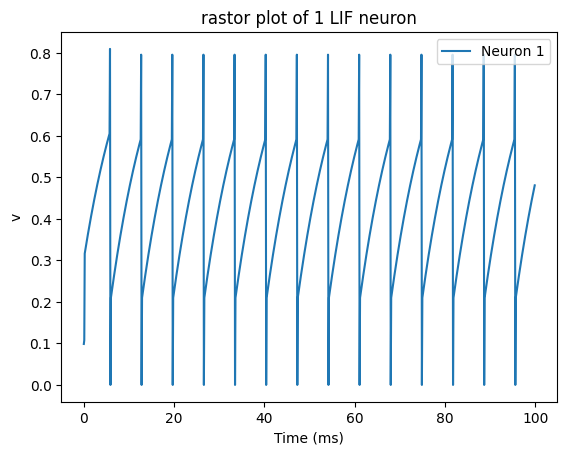

In [ ]:
# Hint for part 1
from brian2 import *
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
I : 1
tau : second
'''

G = NeuronGroup(3, eqs, threshold='v>0.7', reset='v = 0', method='exact')
G.I = [1.1,1.3,1.4]
G.tau = [10,10,10]*ms

S = Synapses(G, G, on_pre='v_post +=0.2')
S.connect()
G.v = 'rand()'
M = StateMonitor(G, 'v', record=True)

run(100*ms)


plot(M.t/ms, M.v[1], label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
title('rastor plot of 1 LIF neuron')
legend();

# put in the rest here

Firing rate:84.3 spikes per second per neuron


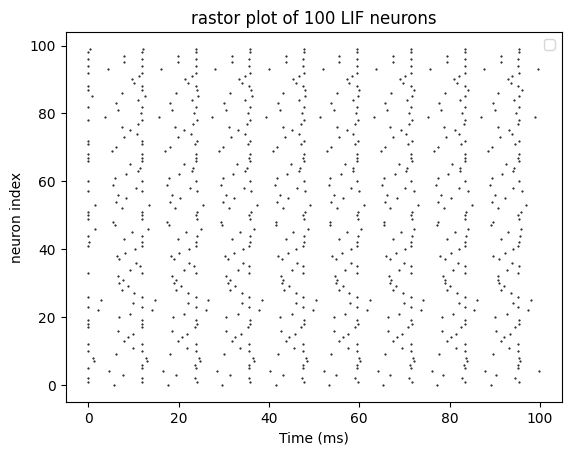

In [ ]:
# Hint for part 2
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

num_neurons = 100
tau = 10*ms
duration = 100*ms
input_current_value = 1  # Constant input current
synaptic_weight = 0.01  # Adjust this if using synaptic connections

# Define the input current function
def input_current(t):
    return input_current_value  # Constant input current


start_scope()

eqs = '''
dv/dt = (1-v)/tau : 1
I : 1
tau = 10*ms : second
'''

#Create neuron group
N = NeuronGroup(num_neurons, eqs, threshold='v>0.7', reset='v = 0', method='exact')

#Normalize synaptic weight by number of connections
#Use this to maintain a more consisent firing rate
C = Synapses(N, N, 'w : 1', on_pre='v_post += w')
connectivity_prob = 0.1
C.connect(p=connectivity_prob)
C.w = synaptic_weight/(num_neurons * connectivity_prob)


N.v ='rand()'
spike_monitor = SpikeMonitor(N)



run(duration = 100*ms)


plot(spike_monitor.t/ms, spike_monitor.i, '.k', markersize=1)
plt.xlabel('Time (ms)')
plt.ylabel('neuron index')
title('rastor plot of 100 LIF neurons')
legend();


#Print the firing rate to ensure it is consistent. Try running simulation with different quantities of neurons
firing_rate = len(spike_monitor.t)/(num_neurons * 100*ms/second)
print(f'Firing rate:{firing_rate} spikes per second per neuron')



In [ ]:
#Hint for part 3:

start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = NeuronGroup(3, eqs, threshold='v>1', reset='v = 0', method='exact')
G.I = [1.1, 1.3, 1.4] # Injected current in the different neurons
G.tau = [10, 10, 10]*ms # Time constants of the three neurons.

S = Synapses(G, G, on_pre='v_post += 0.1')
S.connect() # This indicates all-to-all connectivity
G.v = 'rand()' #Random starting point in membrane potential

# .... put the rest of the code here

Firing rate:86.66666666666667 spikes per second per neuron


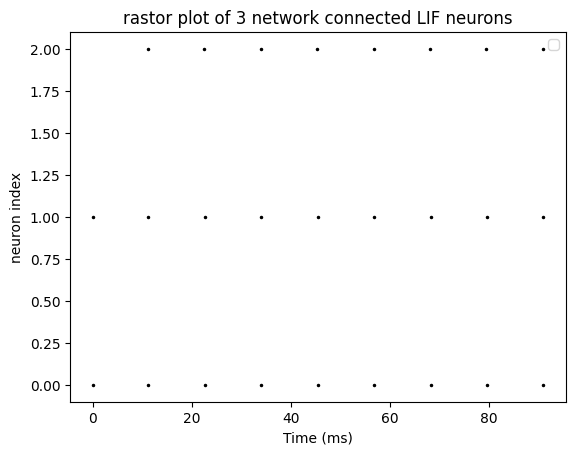

<Figure size 10000x10000 with 0 Axes>

In [ ]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

num_neurons = 3
tau = 10*ms
duration = 100*ms
input_current_value = 1  # Constant input current
synaptic_weight = 0.01  # Adjust this if using synaptic connections

# Define the input current function
def input_current(t):
    return input_current_value  # Constant input current


start_scope()

eqs = '''
dv/dt = (1-v)/tau : 1
I : 1
tau = 10*ms : second
'''


N = NeuronGroup(num_neurons, eqs, threshold='v>0.7', reset='v = 0', method='exact')
C = Synapses(N, N, 'w : 1', on_pre='v_post += w')
C.connect()
connectivity_prob = 0.1
C.connect(p=connectivity_prob)
C.w = synaptic_weight/(num_neurons * connectivity_prob)
N.v ='rand()'
spike_monitor = SpikeMonitor(N)


run(duration = 100*ms)


plot(spike_monitor.t/ms, spike_monitor.i, '.k', markersize=3)
plt.xlabel('Time (ms)')
plt.ylabel('neuron index')
title('rastor plot of 3 network connected LIF neurons')
legend();

plt.figure(figsize=(100,100))

firing_rate = len(spike_monitor.t)/(num_neurons * 100*ms/second)
print(f'Firing rate:{firing_rate} spikes per second per neuron')